In [1]:
import tensorflow as tf

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=10, batch_size=64)

2023-09-29 10:49:55.939113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential([Dense(units=1, input_shape=[1])])
# model.compile(optimizer="sgd", loss="mean_squared_error")

# xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
# ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

# model.fit(xs, ys, epochs=500)

# print(model.predict([10.0]))
# print("Here is what I learned: {}".format(model.get_weights()))

In [3]:
!curl -L https://www.dropbox.com/s/8p5gu3uoygo7gb4/inner_west.csv\?dl\=1 --output inner_west.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100    17    0    17    0     0     58      0 --:--:-- --:--:-- --:--:--    60
100   320  100   320    0     0    476      0 --:--:-- --:--:-- --:--:--   476
100 12260  100 12260    0     0  11678      0  0:00:01  0:00:01 --:--:-- 11678


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

houses = pd.read_csv("inner_west.csv")
houses.tail()

2.13.0


,long,lat,bedrooms,bathrooms,size,price
272,151.093787,-33.866832,2.0,2.0,107.0,681000
273,151.091050,-33.870730,2.0,2.0,108.0,730000
274,151.092959,-33.873966,2.0,1.0,121.7,655000
275,151.091201,-33.866041,2.0,2.0,114.0,678000
276,151.092681,-33.866858,2.0,2.0,111.0,705000


In [5]:
houses.isna().sum()

long           0
lat            0
bedrooms      27
bathrooms     27
size         109
price          0
dtype: int64

In [6]:
houses = houses.dropna()

In [7]:
houses['price'] = houses['price'].apply(lambda x: x/1000000)
houses.tail()


,long,lat,bedrooms,bathrooms,size,price
272,151.093787,-33.866832,2.0,2.0,107.0,0.681
273,151.091050,-33.870730,2.0,2.0,108.0,0.730
274,151.092959,-33.873966,2.0,1.0,121.7,0.655
275,151.091201,-33.866041,2.0,2.0,114.0,0.678
276,151.092681,-33.866858,2.0,2.0,111.0,0.705


In [8]:
# split into training and test data sets
train_dataset = houses.sample(frac=0.8, random_state=0)
test_dataset = houses.drop(train_dataset.index)


/Users/dixon/Code/github/semaphore99/ai-ml-study/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dixon/Code/github/semaphore99/ai-ml-study/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dixon/Code/github/semaphore99/ai-ml-study/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dixon/Code/github/semaphore99/ai-ml-study/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Fut

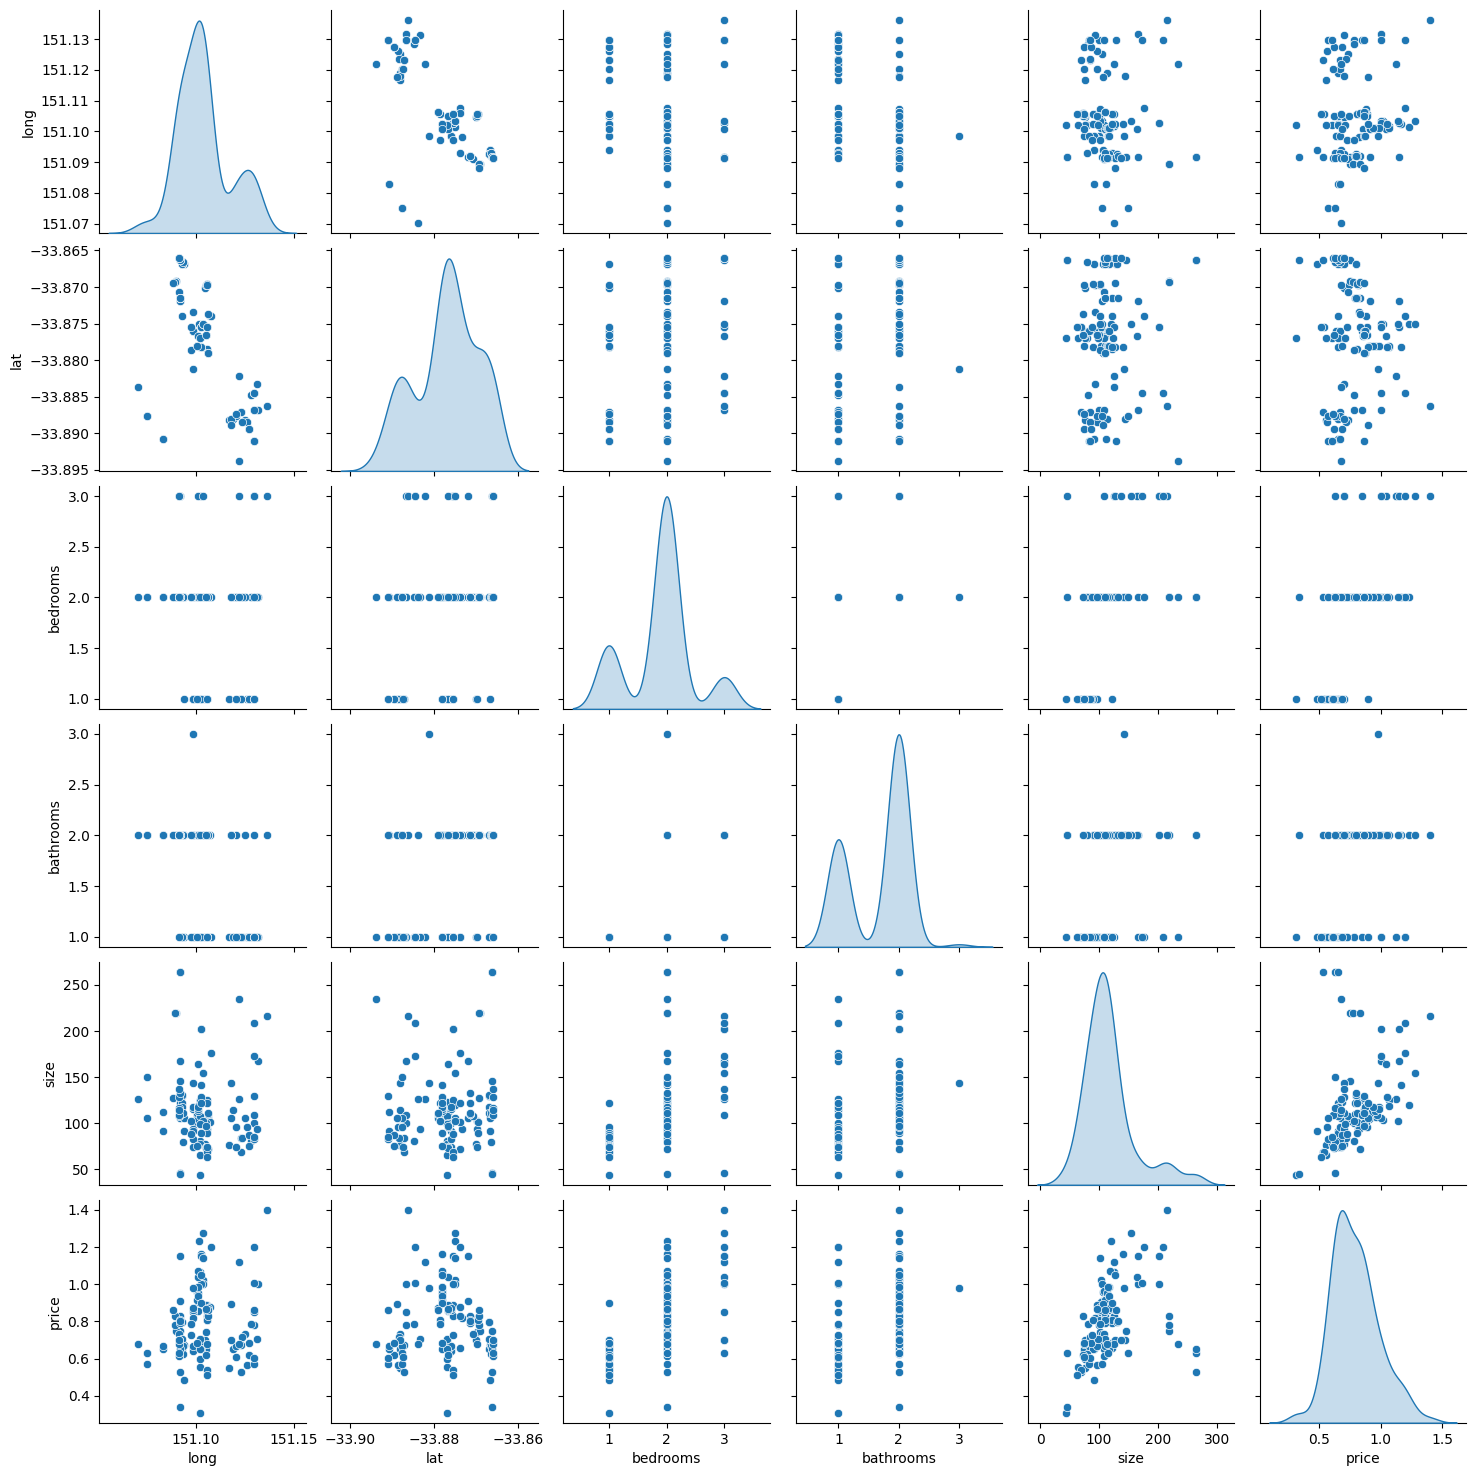

In [9]:
import seaborn as sns
sns.pairplot(train_dataset, diag_kind="kde")


In [10]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
long,126.0,151.103569,0.013274,151.070236,151.092751,151.102042,151.105787,151.136215
lat,126.0,-33.876990,0.007397,-33.893775,-33.880631,-33.876615,-33.871539,-33.866037
bedrooms,126.0,1.896825,0.548881,1.000000,2.000000,2.000000,2.000000,3.000000
bathrooms,126.0,1.674603,0.487104,1.000000,1.000000,2.000000,2.000000,3.000000
size,126.0,116.450200,43.126251,44.000000,91.000000,108.850000,125.750000,264.190000
price,126.0,0.791914,0.189534,0.310000,0.653500,0.782500,0.887500,1.400000


In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

train_labels.head()

7      0.780000
68     1.020895
232    0.485000
239    0.798000
114    0.700000
Name: price, dtype: float64

# Normalisation

In [12]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis = -1)
normalizer.adapt(np.array(train_features))


2023-09-29 10:50:07.984740: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: AMD Radeon Pro 560
2023-09-29 10:50:07.984782: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-29 10:50:07.984795: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.00 GB
2023-09-29 10:50:07.984861: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-29 10:50:07.984910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-09-29 10:50:08.247365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 10:50:08.2

In [13]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized:', normalizer(first).numpy())
    

First example: [[151.13 -33.89   2.     1.   100.3 ]]
Normalized: [[ 1.97 -1.33  0.19 -1.39 -0.38]]


Linear regression with only one variable to predict the price of a house.

In [14]:
import tensorflow.keras.layers as layers
size = np.array(train_features['size'])
size_normalizer = layers.Normalization(input_shape=[1,], axis=None)
size_normalizer.adapt(size)
with np.printoptions(precision=2, suppress=True):
    print('First example:', size[:1])
    print('Normalized:', size_normalizer(size[:1]).numpy())

First example: [100.3]
Normalized: [-0.38]


2023-09-29 10:50:08.704567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 10:50:08.739021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [15]:
type(size_normalizer)

keras.src.layers.preprocessing.normalization.Normalization

In [16]:
size_model = tf.keras.Sequential([
    size_normalizer,
    layers.Dense(units=1)
])

size_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [17]:
# predict without training
size_model.predict(size[:10])

1/1 [==============================] - 0s 167ms/step


2023-09-29 10:50:09.198574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ 0.2178131 ],
       [ 0.181399  ],
       [ 0.34323955],
       [-0.1692555 ],
       [ 0.4915934 ],
       [-0.07484851],
       [ 0.15442559],
       [ 0.07350532],
       [ 0.53205353],
       [-0.08833522]], dtype=float32)

In [18]:
size_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [19]:
# history = size_model.fit(train_features['size'], train_labels, epochs=100, verbose=0, validation_split = 0.2)

history = size_model.fit(
    # the training data we are providing
    train_features['size'],
    # the labels for the training data
    train_labels,
    # how many rounds of training we want to do
    epochs=100,
    # Suppress logging.
    verbose=0,
    validation_split = 0.2)

2023-09-29 10:50:09.678316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 10:50:09.710231: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2023-09-29 10:50:10.110323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.148642,0.108319,95
96,0.144451,0.098244,96
97,0.151135,0.105909,97
98,0.141139,0.152713,98
99,0.143023,0.156973,99


In [21]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [price]')
    plt.legend()
    plt.grid(True)

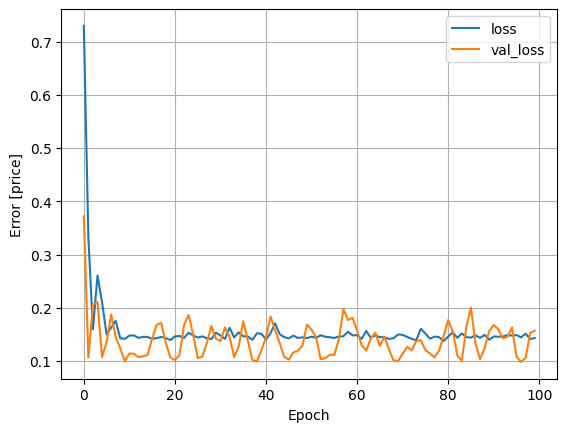

In [22]:
plot_loss(history)

In [23]:
test_results = {}

test_results['size'] = size_model.evaluate(
    test_features['size'],
    test_labels, verbose=0)

x = tf.linspace(0.0, 300, 301)
y = size_model.predict(x)


10/10 [==============================] - 0s 6ms/step


2023-09-29 10:50:17.859232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [24]:
def plot_size(x, y):
    plt.scatter(train_features['size'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('size')
    plt.ylabel('price')
    plt.legend()

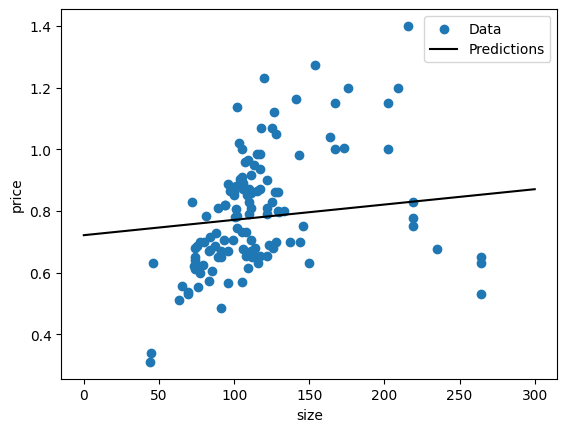

In [25]:
plot_size(x, y)

In [26]:
kevin_unit = [151.10476562624706, -33.879395696733745, 3, 2, 150]

In [27]:
money_formatter = "${:,.2f}"
size_price = size_model.predict(kevin_unit).flatten()[0] * 1000000
print('Predicted price using size only {}'.format(money_formatter.format(size_price)))

1/1 [==============================] - 0s 68ms/step
Predicted price using size only $796,262.26


# Linear regression with multiple features

In [28]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [29]:
# test out model without training
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 85ms/step


2023-09-29 10:50:18.600972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[-1.8958049 ],
       [ 0.02028754],
       [-1.8814244 ],
       [ 0.28560007],
       [-1.4822075 ],
       [ 0.68144244],
       [ 0.35678378],
       [ 0.51990837],
       [-2.4354076 ],
       [ 0.729018  ]], dtype=float32)

In [30]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [31]:
history = linear_model.fit(
    # the training data we are providing
    train_features,
    # the labels for the training data
    train_labels,
    # how many rounds of training we want to do
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


2023-09-29 10:50:19.031120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 10:50:19.062219: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2023-09-29 10:50:19.410411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


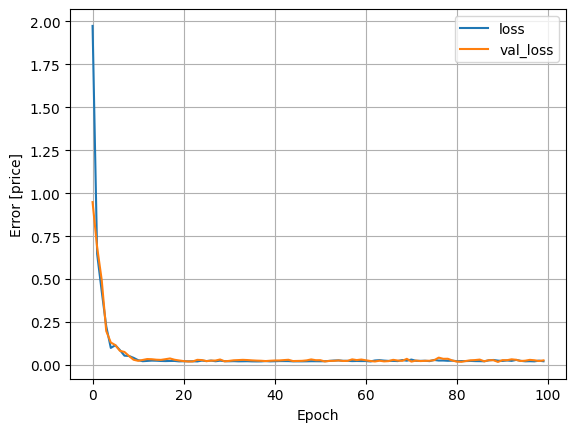

In [32]:
plot_loss(history)

In [33]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)


1/1 [==============================] - 0s 79ms/step


2023-09-29 10:50:27.339248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


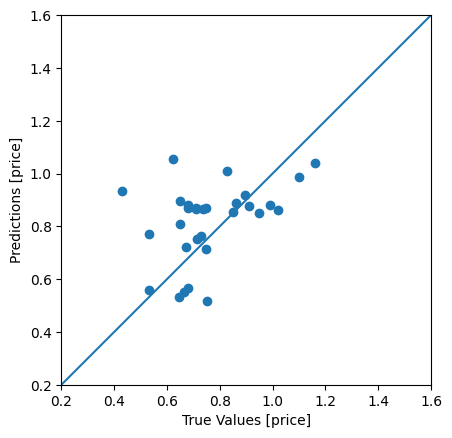

In [34]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
lims = [0.2, 1.6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

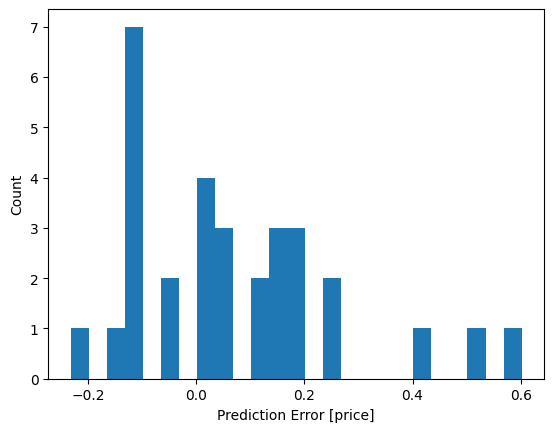

In [35]:
# plot histogram of errors
linear_model_error = test_predictions - test_labels
plt.hist(linear_model_error, bins=25)
plt.xlabel('Prediction Error [price]')
_ = plt.ylabel('Count')

In [36]:
linear_price = linear_model.predict(kevin_unit).flatten()[0] * 1000000
print('Predicted price using linear model {}'.format(money_formatter.format(linear_price)))

1/1 [==============================] - 0s 106ms/step
Predicted price using linear model $1,059,921.62


2023-09-29 10:50:27.828760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# DNN model

In [37]:
# build a model with 2 layers of 64 units each with a ReLU activation function
def build_and_compile_model(norm, layer1Units, layer2Units):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(layer1Units, activation='relu'),
        layers.Dense(layer2Units, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

In [38]:
dnn_house_model = build_and_compile_model(normalizer)
dnn_house_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 5)                 11        
 on)                                                             
                                                                 
 dense_2 (Dense)             (None, 16)                96        
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 180 (724.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 11 (48.00 Byte)
_________________________________________________________________


In [39]:
# with tf.device('GPU:0'):
history = dnn_house_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)

: 